The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.

We use the ‘add()’ function to add layers to our model. We will add two layers and an output layer.

‘Dense’ is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

We have 10 nodes in each of our input layers. This number can also be in the hundreds or thousands.



‘Activation’ is the activation function for the layer. An activation function allows models to take into account nonlinear relationships

In [1]:
# Each image is a 28 by 28 pixel square (784 pixels total).

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Using TensorFlow backend.


11493376/11490434 [==============================] - 152s 13us/step


<Figure size 640x480 with 4 Axes>

In [3]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)

(60000, 28, 28)


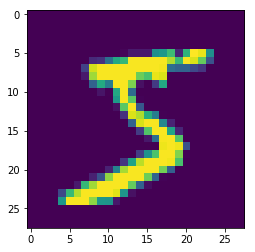

In [9]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [10]:

# Depth = 1
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [11]:
# # The final preprocessing step for 
# the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# pip install np_utils
import numpy as np
import keras
from keras.utils.np_utils import to_categorical
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D,MaxPooling2D,Dropout,Flatten
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# 7. Define model architecture
model = Sequential()
 
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)


e:\python\lib\site-packages\ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2503 - acc: 0.9245
Epoch 2/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1009 - acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0775 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0652 - acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0551 - acc: 0.9834
Epoch 6/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0504 - acc: 0.9847
Epoch 7/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0443 - acc: 0.9866
Epoch 8/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0403 - acc: 0.9872 0s - loss: 0.0403 - acc: 0.987
Epoch 9/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0374 - acc: 0.9885
Epoch 10/10
60000/60000 [==============================] - 2

In [37]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.8)
y_pred
from sklearn import metrics
# Creating the Confusion Matrix
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
matrix

array([[ 978,    0,    0,    0,    0,    0,    2,    0,    0,    0],
       [  12, 1122,    1,    0,    0,    0,    0,    0,    0,    0],
       [  10,    0, 1017,    0,    0,    0,    0,    4,    1,    0],
       [   6,    0,    1, 1000,    0,    1,    0,    1,    1,    0],
       [  11,    0,    0,    0,  968,    0,    1,    0,    0,    2],
       [  11,    0,    0,    7,    0,  872,    2,    0,    0,    0],
       [   6,    2,    0,    0,    0,    1,  947,    0,    2,    0],
       [  10,    0,    3,    0,    0,    0,    0, 1015,    0,    0],
       [  17,    0,    2,    1,    1,    0,    0,    1,  949,    3],
       [  28,    0,    0,    3,    4,    2,    0,    2,    0,  970]],
      dtype=int64)

In [103]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 186s - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0312 - val_acc: 0.9914
Epoch 2/20
 - 182s - loss: 0.0163 - acc: 0.9949 - val_loss: 0.0311 - val_acc: 0.9916
Epoch 3/20
 - 177s - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0309 - val_acc: 0.9916
Epoch 4/20
 - 175s - loss: 0.0164 - acc: 0.9944 - val_loss: 0.0293 - val_acc: 0.9914
Epoch 5/20
 - 176s - loss: 0.0152 - acc: 0.9949 - val_loss: 0.0287 - val_acc: 0.9920
Epoch 6/20
 - 179s - loss: 0.0154 - acc: 0.9948 - val_loss: 0.0308 - val_acc: 0.9911
Epoch 7/20
 - 162s - loss: 0.0157 - acc: 0.9948 - val_loss: 0.0336 - val_acc: 0.9907
Epoch 8/20
 - 163s - loss: 0.0145 - acc: 0.9950 - val_loss: 0.0338 - val_acc: 0.9914
Epoch 9/20
 - 173s - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0325 - val_acc: 0.9919
Epoch 10/20
 - 172s - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0327 - val_acc: 0.9912
Epoch 11/20
 - 172s - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0351 - val_acc: 0.9916
Epoch 12/20
 

NameError: name 'os' is not defined

Saved trained model at c:/users/hp/downloads/keras_mnist.h5 


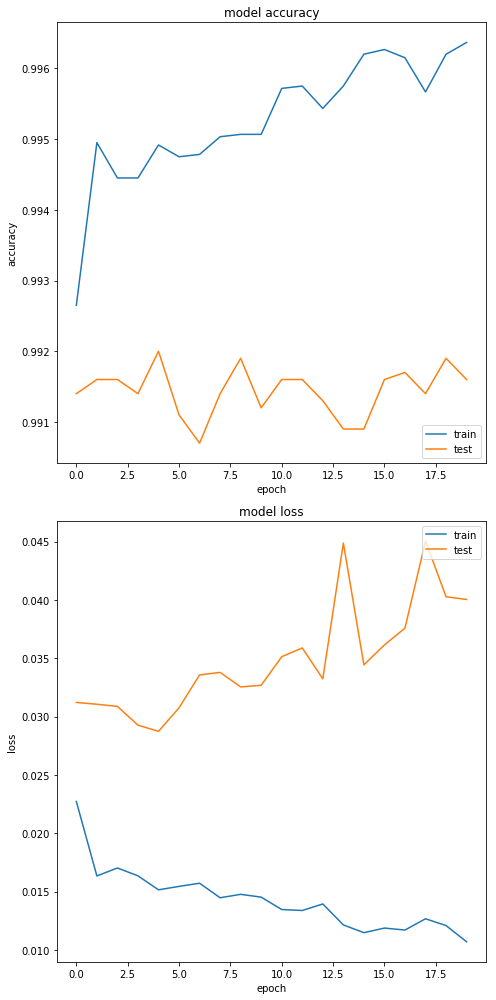

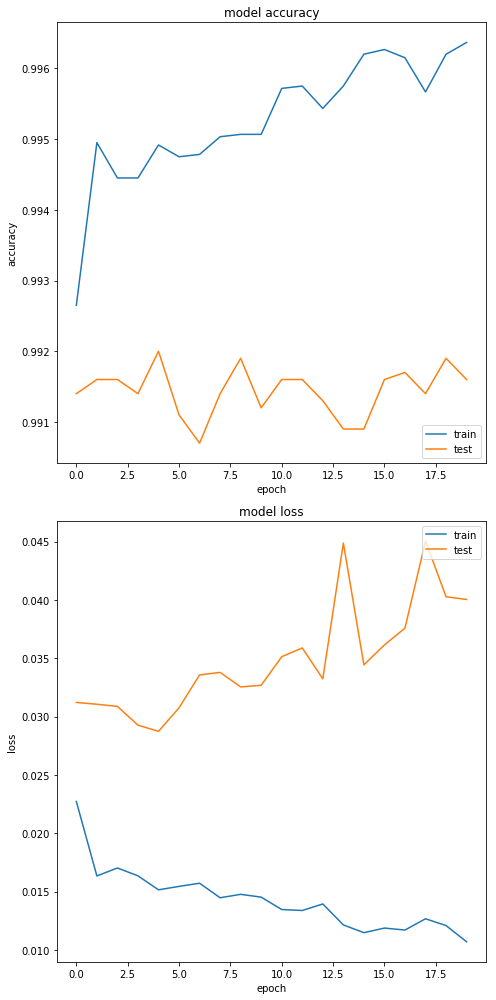

In [104]:
import os
# saving the model
save_dir = "c:/users/hp/downloads/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [107]:
from keras.models import load_model
mnist_model =keras.models.load_model("c:/users/hp/downloads/keras_mnist.h5")

loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.040038983084183244
Test Accuracy 0.9916



9916  classified correctly
84  classified incorrectly


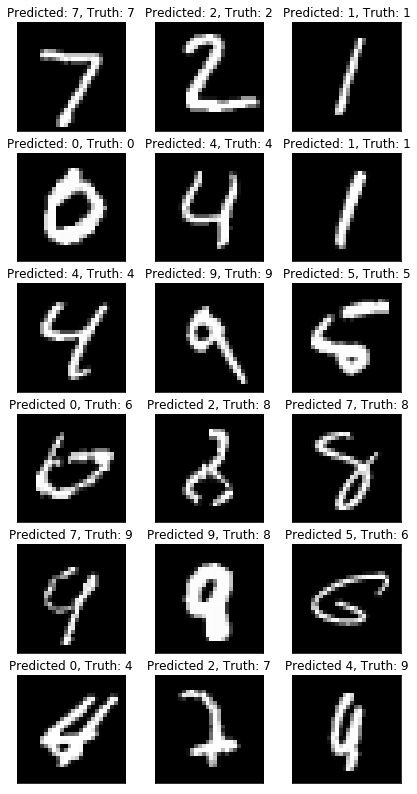

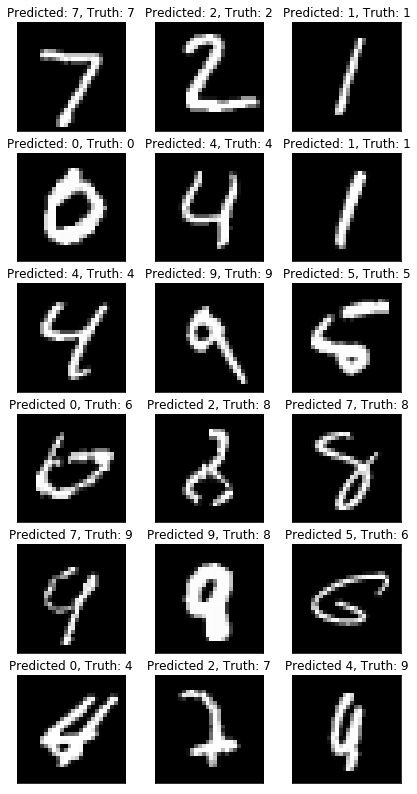

In [108]:
# load the model and create predictions on the test set

predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation